In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('../data/SPOTIFY_REVIEWS.CSV')
df['review_timestamp'] = pd.to_datetime(df['review_timestamp'])

In [5]:
df.head()

,Unnamed: 0,review_id,pseudo_author_id,author_name,review_text,review_rating,review_likes,author_app_version,review_timestamp
0,0,14a011a8-7544-47b4-8480-c502af0ac26f,152618553977019693742,A Google user,Use it every day,5,1,1.1.0.91,2014-05-27 14:21:48
1,1,bfa8876b-470e-4640-83a7-77427f7f37e8,234382942865437071667,A Google user,"I enjoy the awesome UI of this app, and it has...",5,4,1.1.0.91,2014-05-27 14:36:02
2,2,70e8252f-058a-47d9-b066-df9e1571c970,174473604608358796368,A Google user,Love it! Especially the new design!,5,2,1.1.0.91,2014-05-27 14:40:01
3,3,672a155a-e81e-4d28-bdeb-a74c031bc072,286593453219054880269,A Google user,"Awesome UI, best music app out there!",5,1,1.1.0.91,2014-05-27 15:17:20
4,4,bbc1bf95-ed36-41a1-8b98-0f2e314caea5,167276875678680630145,A Google user,As a professional Android developer I'm glad t...,5,10,1.1.0.91,2014-05-27 15:26:48


In [6]:
df.tail()

,Unnamed: 0,review_id,pseudo_author_id,author_name,review_text,review_rating,review_likes,author_app_version,review_timestamp
3377418,3377418,41cafb32-c357-48df-97a3-e3867584f0d6,326345911143311484421,su************to,"Does not work, always says no internet but U t...",1,0,8.8.82.634,2023-11-15 23:11:02
3377419,3377419,ad68b04a-ff48-42f6-992b-bd765cdf9e94,322218874321066319125,Pe*******os,Goodjob,5,0,8.8.82.634,2023-11-15 23:11:29
3377420,3377420,9c36196d-12bc-4049-b7e4-27774a644bed,212802607434520579896,An*********ey,The blues always pull me through.,5,0,8.8.82.634,2023-11-15 23:11:32
3377421,3377421,ce45e1f8-78ad-40cc-a33b-d4e4672b8c78,415238355983315158902,St***en,awesome but you can't choose your song sometimes,4,0,8.8.82.634,2023-11-15 23:15:45
3377422,3377422,be4f53b5-8137-45db-a652-265d0518a174,325323583553822680222,Su***ha,Ads again again n again ...worst app,1,0,8.8.82.634,2023-11-15 23:16:10


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3377423 entries, 0 to 3377422
Data columns (total 9 columns):
 #   Column              Dtype         
---  ------              -----         
 0   Unnamed: 0          int64         
 1   review_id           object        
 2   pseudo_author_id    object        
 3   author_name         object        
 4   review_text         object        
 5   review_rating       int64         
 6   review_likes        int64         
 7   author_app_version  object        
 8   review_timestamp    datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 231.9+ MB


In [8]:
df.describe(include=[object])

,review_id,pseudo_author_id,author_name,review_text,author_app_version
count,3377423,3377423,3377423,3376401,2711000
unique,3377423,3377423,545445,2281787,818
top,14a011a8-7544-47b4-8480-c502af0ac26f,152618553977019693742,A Google user,Good,8.4.72.845
freq,1,1,1843971,55697,46024


In [9]:
df.describe(include=[np.number])

,Unnamed: 0,review_rating,review_likes
count,3.377423e+06,3.377423e+06,3.377423e+06
mean,1.688711e+06,4.043836e+00,1.092705e+00
std,9.749782e+05,1.506860e+00,3.350004e+01
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.443555e+05,4.000000e+00,0.000000e+00
50%,1.688711e+06,5.000000e+00,0.000000e+00
75%,2.533066e+06,5.000000e+00,0.000000e+00
max,3.377422e+06,5.000000e+00,1.382400e+04


In [10]:
df.isna().sum()

Unnamed: 0                 0
review_id                  0
pseudo_author_id           0
author_name                0
review_text             1022
review_rating              0
review_likes               0
author_app_version    666423
review_timestamp           0
dtype: int64

In [11]:
df['review_rating'].value_counts()

review_rating
5    2185815
1     530849
4     348881
3     178543
2     133334
0          1
Name: count, dtype: int64

In [12]:
df['review_likes'].value_counts()

review_likes
0       3108438
1        161224
2         32192
3         14705
4          8882
         ...   
1528          1
4219          1
436           1
2266          1
1822          1
Name: count, Length: 1204, dtype: int64

In [13]:
# feature Unnamed: 0, review_id, pseudo_author_id, author_name and author_app_version will be dropped because got no additional information
df = df.drop(['Unnamed: 0', 'review_id', 'pseudo_author_id', 'author_name', 'author_app_version'], axis=1)

# extract review date into month
df['review_month'] = pd.to_datetime(df['review_timestamp']).dt.month_name()

# extract into semester basis
df['semester'] = df['review_timestamp'].dt.year.astype(str) + ' S' + ((df['review_timestamp'].dt.month - 1) // 6 + 1).astype(str)

# drop the review timestamp
df = df.drop(['review_timestamp'], axis=1)

# remove review with 0 rating
df = df[df['review_rating'] != 0]

# remove duplicates as well
initial_shape = df.shape[0]
print(f"Initial row count, {initial_shape} row")
df = df.drop_duplicates().reset_index(drop=True)

# remove null value in review text
df = df.dropna(subset=['review_text']).reset_index(drop=True)

# Stores the number of rows after removing duplicates
current_shape = df.shape[0]
print(f"current df row count, {current_shape} row")
print(f"There are {initial_shape-current_shape} duplicates found in the dataset")  # Prints the number of duplicates that were removed

Initial row count, 3377422 row
current df row count, 2680592 row
There are 696830 duplicates found in the dataset


In [14]:
# shape - 2,680,592 x 4
df

,review_text,review_rating,review_likes,review_month,semester
0,Use it every day,5,1,May,2014 S1
1,"I enjoy the awesome UI of this app, and it has...",5,4,May,2014 S1
2,Love it! Especially the new design!,5,2,May,2014 S1
3,"Awesome UI, best music app out there!",5,1,May,2014 S1
4,As a professional Android developer I'm glad t...,5,10,May,2014 S1
...,...,...,...,...,...
2680587,"Does not work, always says no internet but U t...",1,0,November,2023 S2
2680588,Goodjob,5,0,November,2023 S2
2680589,The blues always pull me through.,5,0,November,2023 S2
2680590,awesome but you can't choose your song sometimes,4,0,November,2023 S2


In [15]:
import matplotlib.pyplot as plt

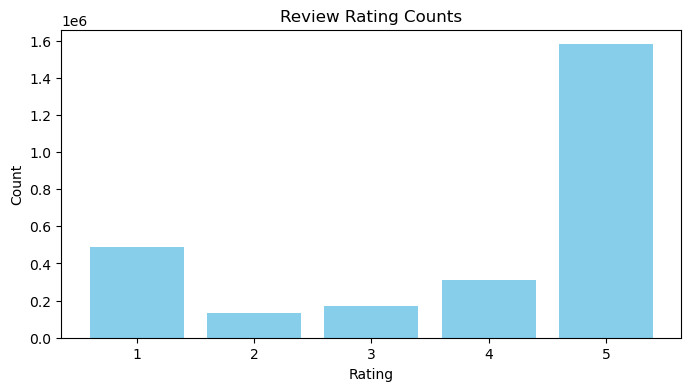

In [16]:
# Count the occurrences
counts = df['review_rating'].value_counts().sort_index(ascending=True)

# Create the bar plot
plt.figure(figsize=(8, 4))
plt.bar(counts.index, counts.values, color='skyblue')

# Set plot labels and title
plt.xlabel('Rating'); plt.ylabel('Count'); plt.title('Review Rating Counts')
plt.show()

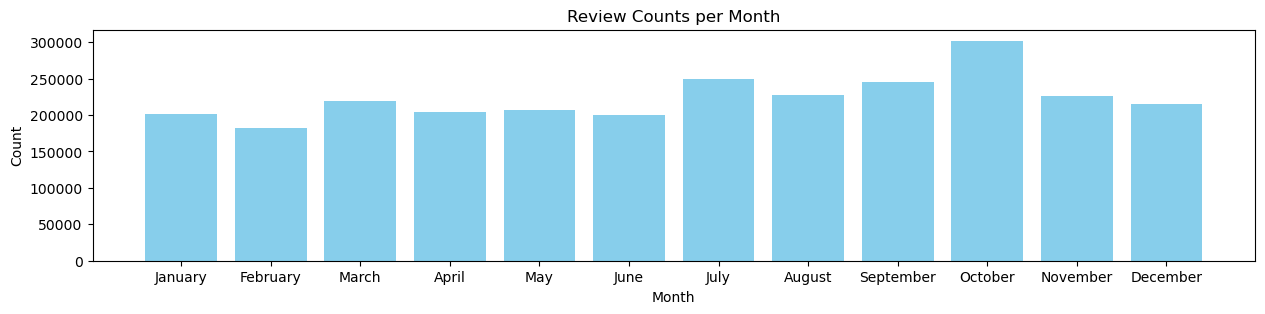

In [17]:
# Count the occurrences
counts = df['review_month'].value_counts().reindex([
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
])

# Create the bar plot
plt.figure(figsize=(15, 3))
plt.bar(counts.index, counts.values, color='skyblue')

# Set plot labels and title
plt.xlabel('Month'); plt.ylabel('Count'); plt.title('Review Counts per Month')
plt.show()

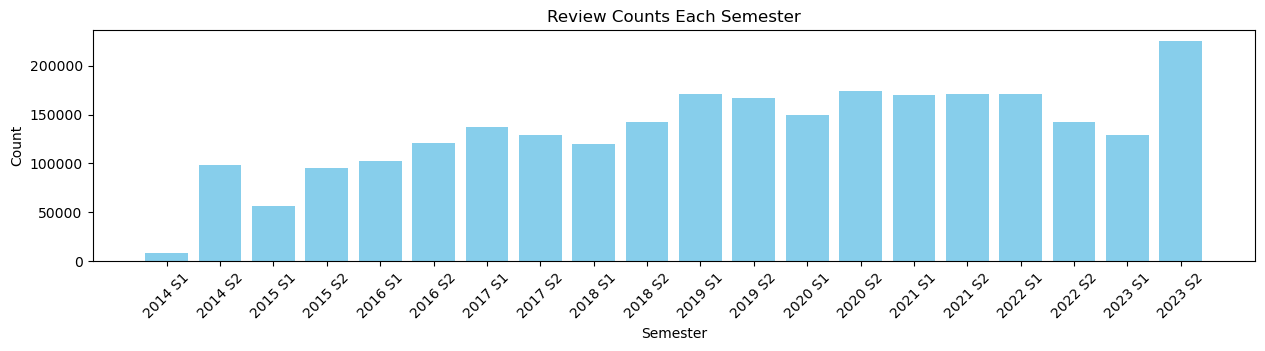

In [18]:
# Count the occurrences
counts = df['semester'].value_counts().sort_index(ascending=True)

# Create the bar plot
plt.figure(figsize=(15, 3))
plt.bar(counts.index, counts.values, color='skyblue')

# Set plot labels and title
plt.xlabel('Semester'); plt.ylabel('Count'); plt.title('Review Counts Each Semester'); plt.xticks(rotation=45)
plt.show()

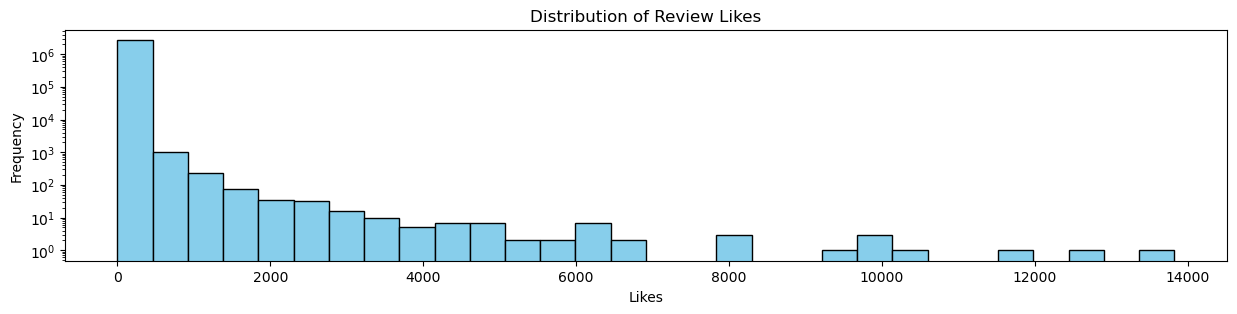

In [19]:
# Histogram of likes
plt.figure(figsize=(15, 3))
plt.hist(df['review_likes'], bins=30, color='skyblue', edgecolor='black', log=True)
plt.xlabel('Likes'); plt.ylabel('Frequency'); plt.title('Distribution of Review Likes')
plt.show()

In [20]:
# for now we are going to only use the text features for our QnA Model

In [21]:
# retain all alphanumeric and symbol, while removing irrelevant text (emoji, etc)
import re

def preprocess_text(input_text):
    # Define regex pattern to retain alphanumeric characters, symbols, and spaces
    pattern = r'[^a-zA-Z0-9\s!@#$%&*()-_=+,.;:?/"\'\\<>[\]{}^`~]'
    # Replace matched pattern with empty string
    processed_text = re.sub(pattern, '', input_text)
    # Remove extra white spaces
    processed_text = re.sub(r'\s+', ' ', processed_text).strip()
    return processed_text

df['review_text'] = df['review_text'].apply(preprocess_text)

In [22]:
initial_shape = df.shape[0]
print(f"Initial row count, {initial_shape} row")

Initial row count, 2680592 row


In [23]:
# remove duplicated text that exist
df = df.iloc[df['review_text'].drop_duplicates(keep='first').index].reset_index(drop=True)

# remove review that only contains number
df = df[df['review_text'].apply(lambda x: pd.to_numeric(x, errors='coerce')).isnull()]

# remove null value and empty value
df = df[df['review_text'] != '']
df = df.dropna(subset=['review_text']).reset_index(drop=True)

In [24]:
current_shape = df.shape[0]
print(f"current df row count, {current_shape} row")
print(f"There are {initial_shape-current_shape} problematic text in the dataset")

current df row count, 2205421 row
There are 475171 problematic text in the dataset


In [25]:
# analyze the word length
df['text_len'] = df['review_text'].apply(lambda x:len(x.split()))

In [26]:
df['text_len'].describe()

count    2.205421e+06
mean     1.833830e+01
std      1.944598e+01
min      1.000000e+00
25%      6.000000e+00
50%      1.100000e+01
75%      2.300000e+01
max      6.990000e+02
Name: text_len, dtype: float64

In [27]:
# text word length with percentile from 0 to 100
print('percentile ', np.linspace(0, 100, 11))
print('text length ', np.percentile(df['text_len'], np.linspace(0, 100, 11)))

percentile  [  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]
text length  [  1.   3.   5.   7.   9.  11.  15.  20.  28.  43. 699.]


In [28]:
# review with most length is around 699, we can trim this down so the length is quite similar with other review.
print('percentile ', [95,97,99,99.9])
print('text length ', np.percentile(df['text_len'], [95,97,99,99.5]))

# we can cut the max text length into just 100 words

percentile  [95, 97, 99, 99.9]
text length  [61. 74. 92. 97.]


In [29]:
def preprocess_review_text(review_text):
    # Split the review_text into words
    words = review_text.split()
    # Trim the words to a maximum of 100
    trimmed_words = words[:100]
    # Join the trimmed words back into a single string
    trimmed_review_text = ' '.join(trimmed_words)
    return trimmed_review_text

df['review_text'] = df['review_text'].apply(preprocess_review_text)
df['text_len'] = df['review_text'].apply(lambda x:len(x.split()))

In [30]:
# text word length with percentile from 0 to 100
print('percentile ', np.linspace(0, 100, 11))
print('text length ', np.percentile(df['text_len'], np.linspace(0, 100, 11)))

percentile  [  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]
text length  [  1.   3.   5.   7.   9.  11.  15.  20.  28.  43. 100.]


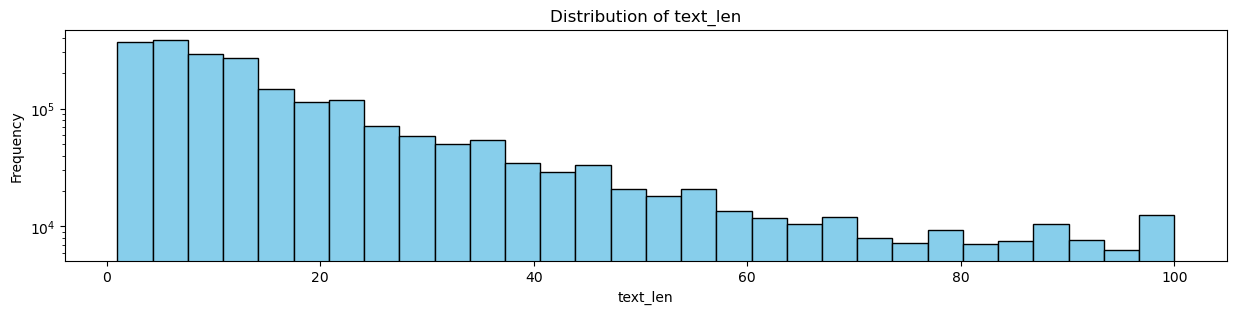

In [31]:
# Histogram of likes
plt.figure(figsize=(15, 3))
plt.hist(df['text_len'], bins=30, color='skyblue', edgecolor='black', log=True)
plt.xlabel('text_len'); plt.ylabel('Frequency'); plt.title('Distribution of text_len')
plt.show()

In [32]:
# calculate each review tokens, for embedding cost calculation

In [33]:
import tiktoken

def num_tokens_from_string(string: str) -> int:
    """Returns the number of tokens in a text string."""
    encoding = tiktoken.get_encoding("cl100k_base")
    num_tokens = len(encoding.encode(string))
    return num_tokens

df['review_token'] = df['review_text'].apply(num_tokens_from_string)

In [34]:
df['review_token'].sum()

47725458

In [ ]:
# embedding pricing using text-embedding-3-small 
# 62,500 pages per dollar
# ~800 token per pages
# 1 dollar = 50,000,000 token

In [ ]:
# estimated embedding whole dataset is around 1 dollar
# 47,725,692

In [ ]:
# we can use all of the dataset, so we will not sample and use whole text as our source of QnA bot
df.shape

(2205422, 7)

In [35]:
df = df.dropna(subset=['review_text']).reset_index(drop=True)

In [36]:
df.to_csv('../data/SPOTIFY_REVIEWS_CLEAN.csv', index=False)

==========================================================================================

In [22]:
# Calculate percentiles
percentiles = np.percentile(df['text_len'], np.linspace(0, 100, 11))

# Bucketize text lengths based on percentiles
df['text_len_bucket'] = pd.cut(df['text_len'], bins=percentiles, labels=range(1, 11))

In [36]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_colwidth', 1000)
df[df['text_len'] == 100].head(10)

,review_text,review_rating,review_likes,review_month,semester,text_len
569,"Love Spotify. Love how it reinvented the way we find and listen to music. Also love the fact that I never have to download music from the web or buy it from overpriced iTunes again. However, it's not a huge deal, but a heads-up would have been nice... To those whining about having to listen to music on shuffle mode: what do you expect? The artists have to make money somehow, right? So if you wanna listen to the music of YOUR choice whenever YOU like on all of your little gadgets, quit crying and cough up the $10/month...it's really",5,1,May,2014 S1,100
687,"Use it all the time. Use it on my phone, computer and tablet. Can't say enough about how much the premium is worth $10 a month. Easily the best investment. Only downside is they don't have all of the songs I want and some times they don't have new songs as early as I'd like but it's rare that they don't get the songs relatively quickly and the ones they don't have are pretty hard to find anyway so I don't blame them. I'd give them a 4.7/5 if I could just for that reason but other than that it's",5,0,May,2014 S1,100
1472,"So I pay spotify a subscription fee only to arrive at work to be told I have to re download spotify to use the app? I download it on painfully slow uk mobile broadband at my expense to find my entire library has been removed from my phone..... So I have to go a long 12 hour workday in front of financial spreadsheets with no music. Thanks a lot spotify for this stupid move. Every other app on the app store keeps data when it updates, why not yours? And why force the update? No Grace period? ? I will",1,0,May,2014 S1,100
2074,"I keep an old phone just for running etc and only have music, camera and map apps on there. For some reason Spotify has more than quadrupled in size so I can neither use the old app nor install the new one owing to limited space. So in the twinkling of an eye Spotify has rendered itself useless on that device. Along with the other well publicised issues with 'Your Music' versus playlists, and the API limitations and it's looking like another Facebook debacle. Why app developers feel it makes sound commercial sense to force users to be limited to",3,0,May,2014 S1,100
2294,"I would give anything for the ""+"" to be used for adding songs to playlists. Because it's the addition sign and generally that means adding something to something else not saving it for safekeeping (maybe use the ole floppy disk vector since everyone recognizes that as saving even though they have no idea what that image is). Also bring back the star button. now I have two favorite lists and it's really frustrating cause I would like them all my favorites to be on one go to lists cause that is how I have been using your service. Ugh it's",3,0,May,2014 S1,100
2391,"After many years of subscription I finally gave up. Constant issues with the Android app with little or no focus on tablet users. Clueless customer support, it's really not my job as a paying customer to explain them how Android works and if it is, how can I ever get helpful replies? They even discontinued support for many Android devices while preventing the use of old app just few days ago. Too bad since the service itself is great and Spotify in my opinion is the company that started it all but if I have zero issues with competitor's functionality,",2,0,May,2014 S1,100
2396,"I don't even mind that I had to redownload everything - that happens every now and then anyway. What bothers me is that we have a piece of software that manages to make my phone crash, forget that files are downloaded, not even start up, struggle to move from one track to the next and any number of other problems. I know my phone's almost 2 whole years old (shocking I know...), but you'd think a quad core processor and 2GB of RAM would be enough to run a music app solidly... When it works, I love Spotify - it's",3,0,May,2014 S1,100
3470,"I like to use the soun